<a href="https://colab.research.google.com/github/ITAM-DS/deep-learning/blob/colab-notebooks/codigo/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulacion de datos

En general utilizamos arreglos para almacenar nuestros datos. Una instancia suficientemente general son los llamdos **tensores**. Estos representan las unidades básicas de almacenamiento en aplicaciones de Aprendizaje Profundo (DL). 

Si ya has estado familiarizada con _matrices_ entonces ya has trabajado con tensores de 2 dimensiones. Los tensores son generalizaciones de tensores a mas dimensiones.

## Escalares (tensores de dimension 0) 

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [87]:
x = np.array(12)
x

array(12)

In [88]:
x.ndim

0

## Vectores (tensores de dimension 1)


In [89]:
x = np.array([1, 4, 5 ,9])
x

array([1, 4, 5, 9])

In [90]:
x.ndim

1

## Matrices (tensores de dimension 2)


In [91]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [92]:
x.ndim

2

## Tensores de dimension 3

In [93]:
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [94]:
x.ndim

3

## Atributos clave

Un tensor tiene tres atributos clave: 

- **Rango** El número de ejes (_axis_). Lo podemos verificar con el atributo `ndim` en arreglos de `Numpy`.
- **Forma** (_Shape_) Es una tupla de enteros que describe cuantas dimensiones tiene el tensor en cada eje. La matriz anterior tiene forma `(3, 5)`, el tensor de 3 dimensiones tiene forma `(3, 3, 5)`. 
- **Tipo de datos** (_data type_) Es el tipo de datos contenido en un tensor (lo consultamos con la propiedad `dtype`). Los mas comunes son: 
`float32`, `uint8`, `float64`. 

Podemos explorar estas propiedades en un conjunto de datos clasico en DL. 

In [95]:
from tensorflow.keras.datasets import mnist

In [96]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [97]:
print('Rank      :   %i'%train_images.ndim)
print('Shape     : (%i, %i, %i)'%train_images.shape)
print('Data type : %s'%train_images.dtype)

Rank      :   3
Shape     : (60000, 28, 28)
Data type : uint8


### En la practica: manipulando MNIST

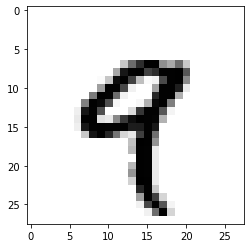

In [98]:
digit = train_images[4]

plt.imshow(digit, cmap = plt.cm.binary)

In [99]:
print('Rank      : %i'%digit.ndim)
print('Shape     : (%i, %i)'%digit.shape)
print('Data type : %s'%digit.dtype)

Rank      : 2
Shape     : (28, 28)
Data type : uint8


## Operaciones de corte (_slicing_)

In [100]:
my_slice_1 = train_images[0:100]
print(my_slice_1.shape)

(100, 28, 28)


In [101]:
my_slice_2 = train_images[0:100, :, :]
print(my_slice_2.shape)

(100, 28, 28)


In [102]:
my_slice_3 = train_images[0:100, 0:28, 0:28]
print(my_slice_3.shape)

(100, 28, 28)


In [103]:
print((my_slice_1 == my_slice_2).all())
print((my_slice_1 == my_slice_3).all())
print((my_slice_3 == my_slice_2).all())

True
True
True


## Bloques de datos

In [104]:
batch = train_images[:128]
print(batch.shape)

(128, 28, 28)


In [105]:
batch = train_images[128:256]
print(batch.shape)

(128, 28, 28)


In [106]:
batch_size = 128
batch_images = train_images[:1024].reshape(-1, 128, 28, 28)
print(batch_images.shape)

(8, 128, 28, 28)


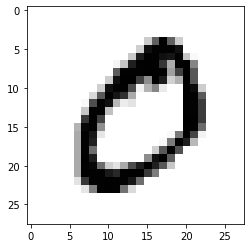

In [107]:
batch_num = 0
image_num = 1
plt.imshow(batch_images[batch_num, image_num], cmap = plt.cm.binary)

## Ejemplos


- **Datos en vectores** tensores de 2D (observaciones, atributos)
- **Series de tiempo o datos secuenciales** Tensores de 3D (observaciones, tiempo, atributos)
- **Imagenes** Tensores de 4D (observaciones, alto, ancho, canal) o (observaciones, canal, alto, ancho)
- **Video** Tensores de 5D (observaciones, _frames_, alto, ancho, canal) o (observaciones, _frames_, canal, alto, ancho)


¿Cuál sería la forma de guardar en un tensor un video de 60 segundos de YouTube de resolucion $144 \times 256,$ muestreado a 4 imagenes por segundo?

¿Cuál es el tamaño aproximado si se guarda en un tensor con `dtype` igual a `float32`?

## Ajustando una red neuronal

In [108]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [109]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [110]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [111]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10 , activation='softmax'))

In [112]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [113]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [114]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [115]:
train_size = 20000
val_images = train_images[train_size:]
partial_train_images = train_images[:train_size]

val_labels = train_labels[train_size:]
partial_train_labels = train_labels[:train_size]


In [116]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [117]:
history = network.fit(partial_train_images, 
                      partial_train_labels, 
                      epochs=20, 
                      batch_size=128, 
                      validation_data = (val_images, val_labels))

Epoch 1/20
157/157 [==============================] - 2s 8ms/step - loss: 0.6564 - accuracy: 0.8068 - val_loss: 0.2475 - val_accuracy: 0.9294
Epoch 2/20
157/157 [==============================] - 1s 7ms/step - loss: 0.2003 - accuracy: 0.9419 - val_loss: 0.2071 - val_accuracy: 0.9367
Epoch 3/20
157/157 [==============================] - 1s 8ms/step - loss: 0.1249 - accuracy: 0.9648 - val_loss: 0.1898 - val_accuracy: 0.9428
Epoch 4/20
157/157 [==============================] - 1s 7ms/step - loss: 0.0830 - accuracy: 0.9752 - val_loss: 0.1508 - val_accuracy: 0.9555
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 0.0589 - accuracy: 0.9841 - val_loss: 0.1184 - val_accuracy: 0.9654
Epoch 6/20
157/157 [==============================] - 1s 7ms/step - loss: 0.0437 - accuracy: 0.9883 - val_loss: 0.1199 - val_accuracy: 0.9647
Epoch 7/20
157/157 [==============================] - 1s 7ms/step - loss: 0.0323 - accuracy: 0.9916 - val_loss: 0.1319 - val_accuracy: 0.9616
Epoch 

In [118]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1401 - accuracy: 0.9736


In [119]:
print('Precision en prueba:', np.round(test_acc, 5))

Precision en prueba: 0.9736


In [120]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

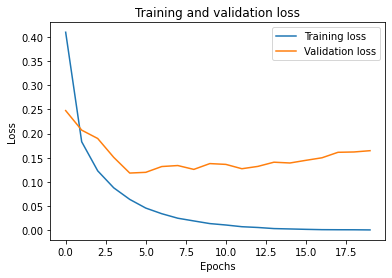

In [121]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

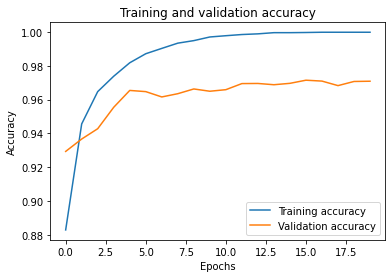

In [122]:
plt.plot(history.history['accuracy'], label = "Training accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()